In [796]:
import pandas as pd
import numpy as np

# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import add_constant
from sklearn.tree import plot_tree


# 모델 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 로지스틱 회귀
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score

# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

# 서포트 벡터 머신
from sklearn.svm import SVC 

# kNN
from sklearn.neighbors import KNeighborsClassifier

# 모델 성능 평가
from sklearn.metrics import confusion_matrix

In [714]:
matplotlib.rc("font",family="Malgun Gothic")

# 데이터 불러오기

In [715]:
df_raw = pd.read_csv("./data/SCALE불량.csv",encoding="cp949")
df_raw.head()

,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1125,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1120,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1106,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1113,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1118,873,적용,8,1조


# 데이터 구성 확인하기

In [716]:
df_raw.shape

(720, 21)

설명변수는 21개, 데이터는 720개이다.

In [717]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PLATE_NO           720 non-null    object 
 1   ROLLING_DATE       720 non-null    object 
 2   SCALE              720 non-null    object 
 3   SPEC               720 non-null    object 
 4   STEEL_KIND         720 non-null    object 
 5   PT_THK             720 non-null    float64
 6   PT_WDTH            720 non-null    int64  
 7   PT_LTH             720 non-null    int64  
 8   PT_WGT             720 non-null    int64  
 9   FUR_NO             720 non-null    object 
 10  FUR_NO_ROW         720 non-null    int64  
 11  FUR_HZ_TEMP        720 non-null    int64  
 12  FUR_HZ_TIME        720 non-null    int64  
 13  FUR_SZ_TEMP        720 non-null    int64  
 14  FUR_SZ_TIME        720 non-null    int64  
 15  FUR_TIME           720 non-null    int64  
 16  FUR_EXTEMP         720 non

- PLATE_NO, ROLLING_DATE, SCALE, SPEC, STEEL_KIND, FUR_NO, HSB, WORK_GR이 string이다.  
- 결측치는 없는 상태이다.

# 데이터 전처리

## 결측치 처리하기

In [718]:
df_raw.isnull().sum(axis = 0)

PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

운이 좋게도 결측치는 없는 데이터이다.

## 필요없는 변수 제거

PLATE_NO, ROLLING_DATE는 SCALE 불량 여부에 영향을 미치지 않을 것이라고 판단해서 삭제하였다.

In [719]:
df_raw.drop(["PLATE_NO","ROLLING_DATE"],axis=1,inplace=True)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


## 명목형 변수들의 값 목록 확인하기

In [720]:
df_raw["STEEL_KIND"].unique()

array(['T1', 'T8', 'T0', 'T5', 'C0', 'C3', 'C1', 'T7', 'T3'], dtype=object)

분류를 쉽게 하기 위해 T 종류 강종과, C 종류 강종 이렇게 2가지로 나누기로 했다. (C:Carbon steel, T:Tool steel)

In [721]:
df_raw["STEEL_KIND"] = df_raw["STEEL_KIND"].str[:1]  # 가장 앞글자만 따옴 (즉, T 혹은 C)
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


In [722]:
df_raw["FUR_NO_ROW"].unique()

array([1, 2])

FUR_NO_ROW는 수치형 변수지만 실질적으로 2가지의 값만 가지므로 명목형 변수인 셈이다.

In [723]:
df_raw["ROLLING_DESCALING"].unique()

array([ 8,  5,  6, 10,  9,  7])

ROLLING_DESCALING 또한 나오는 값의 가짓수가 적으므로 실질적으로 명목형 변수인 셈이다.

## 이상치 처리하기

boxplot을 그릴 때 내부에서 자동적으로 수치형 변수에 대해서만 그려준다.

<AxesSubplot:>

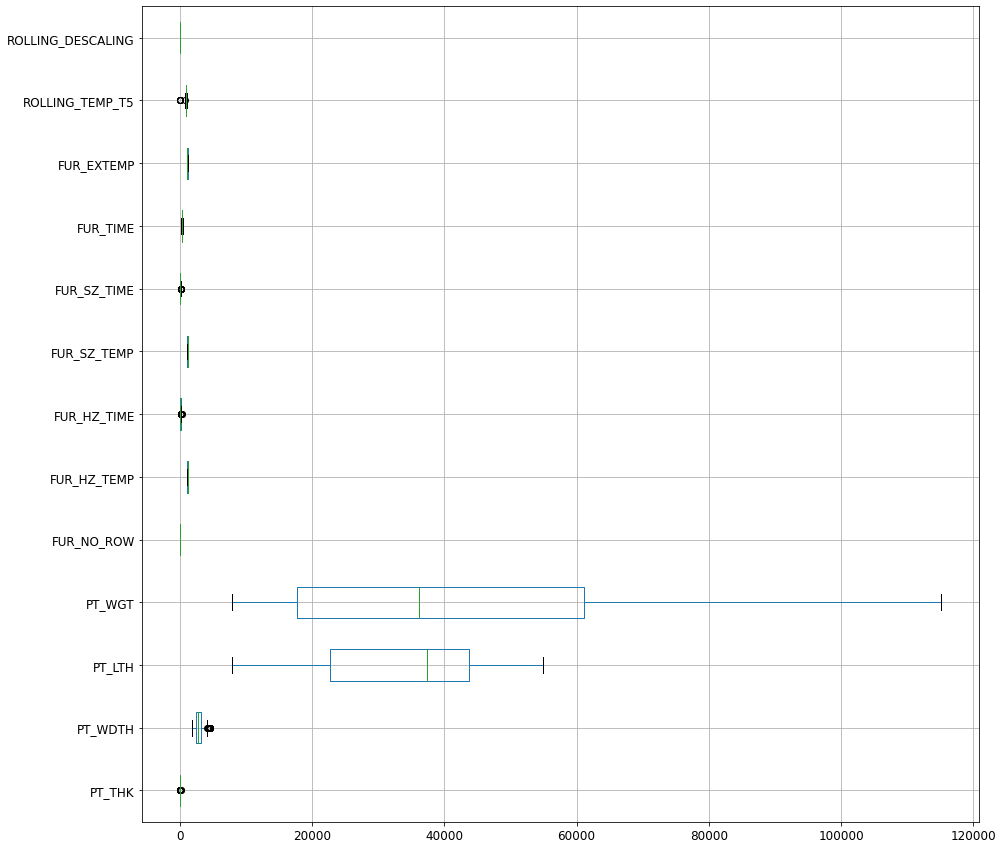

In [724]:
df_raw.boxplot(figsize=(15,15),fontsize=12,vert=False)

- ROLLING_TEMP_T5, FUR_SZ_TIME, FUR_HZ_TIME, PT_WIDTH, PT_THK에 이상치가 있는 상황이다.
- 수치형 변수들에 대해 단위가 달라 변수마다 box의 크기 차이가 큰 상황이다. → 수치형에 대해 scale 필요

array([[<AxesSubplot:title={'center':'PT_THK'}>,
        <AxesSubplot:title={'center':'PT_WDTH'}>,
        <AxesSubplot:title={'center':'PT_LTH'}>,
        <AxesSubplot:title={'center':'PT_WGT'}>],
       [<AxesSubplot:title={'center':'FUR_NO_ROW'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TEMP'}>],
       [<AxesSubplot:title={'center':'FUR_SZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_TIME'}>,
        <AxesSubplot:title={'center':'FUR_EXTEMP'}>,
        <AxesSubplot:title={'center':'ROLLING_TEMP_T5'}>],
       [<AxesSubplot:title={'center':'ROLLING_DESCALING'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

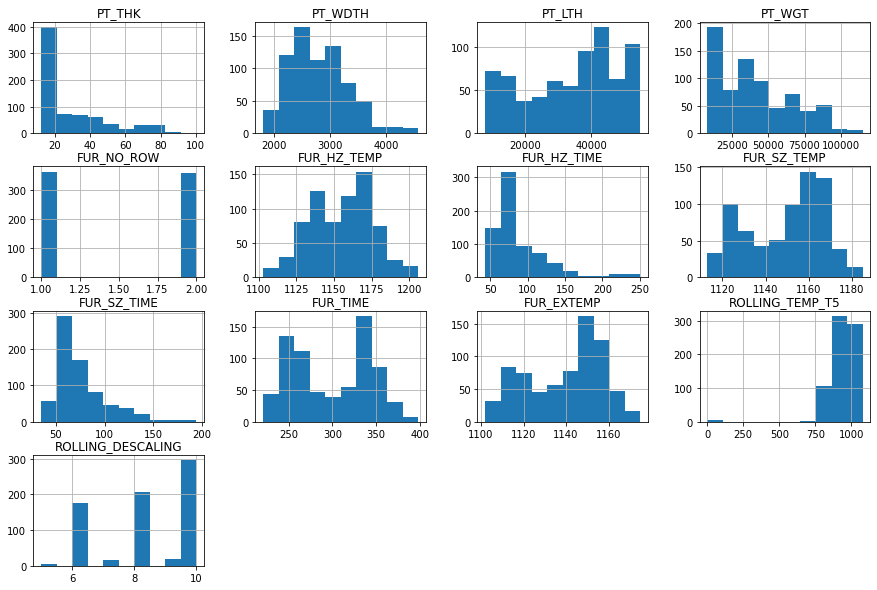

In [725]:
df_raw.hist(figsize=(15, 10))

- ROLLING_DESCALING, FUR_NO_ROW는 실질적으로 명목형이므로 논외
- **ROLLING_TEMP_T5가 "압연온도" (섭씨)인데 0도인 데이터**가 약간 있는 것으로 드러났다. → **비정상적인 데이터**라고 판단

In [726]:
df_raw[df_raw["ROLLING_TEMP_T5"] == 0]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
41,양품,GL-E36-TM,T,55.51,3765,11398,37400,3호기,2,1132,95,1128,80,341,1123,0,적용,6,1조
184,양품,JS-SM490YB,C,16.09,2221,43596,61150,3호기,1,1169,64,1164,61,308,1155,0,적용,10,3조
185,양품,JS-SM490YB,C,16.09,2221,43596,61150,3호기,2,1163,57,1166,67,303,1158,0,적용,10,4조
494,양품,PILAC-BT33,T,80.82,2085,12919,17090,2호기,1,1133,89,1122,59,378,1112,0,적용,6,2조
495,양품,PILAC-BT33,T,80.82,2085,13176,17430,1호기,2,1130,92,1124,61,362,1116,0,적용,6,3조
496,양품,NV-D32-TM,T,40.35,2497,23592,37320,3호기,1,1119,109,1117,76,383,1107,0,적용,6,3조


In [727]:
df_raw.drop(df_raw[df_raw["ROLLING_TEMP_T5"] == 0].index, inplace = True)  # ROLLING_TEMP_T5=0인 데이터 삭제
df_raw[df_raw["ROLLING_TEMP_T5"] == 0]

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR


이제 ROLLING_TEMP_T5가 0인 데이터가 다 삭제된 상태이다.

In [728]:
df_raw.shape

(714, 19)

6개를 삭제해서 714개의 데이터가 남은 상황이다.

## 수치형 변수 scaling 하기

앞에서 본 Box Plot 결과에 의해 수치형 변수들을 scaling하기로 했다.

In [729]:
df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,1,1144,116,1133,59,282,1125,934,적용,8,2조
1,양품,AB/EH32-TM,T,32.25,3707,15109,14180,1호기,2,1144,122,1135,53,283,1120,937,적용,8,2조
2,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,1,1129,116,1121,55,282,1106,889,적용,8,3조
3,양품,NV-E36-TM,T,33.27,3619,19181,18130,2호기,2,1152,125,1127,68,316,1113,885,적용,8,3조
4,양품,BV-EH36-TM,T,38.33,3098,13334,12430,3호기,1,1140,134,1128,48,314,1118,873,적용,8,1조


In [730]:
# 정말 수치형인 변수들
df_neumeric = df_raw[["PT_THK","PT_WDTH","PT_LTH","PT_WGT","FUR_HZ_TEMP","FUR_HZ_TIME","FUR_SZ_TEMP","FUR_SZ_TIME","FUR_TIME","FUR_EXTEMP","ROLLING_TEMP_T5"]]

# 정말 명목형이거나 혹은 타입 자체는 수치형이지만 실질적으로 명목형이나 다름 없는 변수들
df_categorical = df_raw[["SCALE","SPEC","STEEL_KIND","FUR_NO","FUR_NO_ROW","HSB","ROLLING_DESCALING","WORK_GR"]]

In [731]:
scaler = StandardScaler()
np_neumeric_scaled = scaler.fit_transform(df_neumeric)
df_neumeric_scaled = pd.DataFrame(np_neumeric_scaled,columns=df_neumeric.columns)

In [732]:
df_neumeric_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678


In [733]:
df_categorical.head()

,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T,1호기,1,적용,8,2조
1,양품,AB/EH32-TM,T,1호기,2,적용,8,2조
2,양품,NV-E36-TM,T,2호기,1,적용,8,3조
3,양품,NV-E36-TM,T,2호기,2,적용,8,3조
4,양품,BV-EH36-TM,T,3호기,1,적용,8,1조


In [734]:
# df_neumeric_scaled, df_categorical 두 개의 index가 약간 상이했는지 join한 이후로 결측치가 발생해서
# index를 다시 세팅해주기로 했다.
df_neumeric_scaled = df_neumeric_scaled.reset_index(drop=True)
df_categorical = df_categorical.reset_index(drop=True)

In [735]:
df_scaled = df_neumeric_scaled.join(df_categorical)

In [736]:
df_scaled.isnull().sum()

PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
SCALE                0
SPEC                 0
STEEL_KIND           0
FUR_NO               0
FUR_NO_ROW           0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64

In [737]:
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,ROLLING_DESCALING,WORK_GR
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132,양품,AB/EH32-TM,T,1호기,1,적용,8,2조
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514,양품,AB/EH32-TM,T,1호기,2,적용,8,2조
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387,양품,NV-E36-TM,T,2호기,1,적용,8,3조
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210,양품,NV-E36-TM,T,2호기,2,적용,8,3조
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678,양품,BV-EH36-TM,T,3호기,1,적용,8,1조


In [738]:
# 한글이 제대로 나오지 않아 영어로 처리

df_scaled.replace({'SCALE': '양품'}, {"SCALE": 'flawless'},inplace=True)
df_scaled.replace({'SCALE': '불량'}, {'SCALE': 'defected'},inplace=True)

df_scaled.replace({'HSB': '적용'}, {'HSB': "applied"},inplace=True)
df_scaled.replace({'HSB': '미적용'},{'HSB': "not-applied"},inplace=True)

df_scaled["FUR_NO"] = df_scaled["FUR_NO"].str[:1]  # 가장 앞글자만 따옴
df_scaled["WORK_GR"] = df_scaled["WORK_GR"].str[:1]  # 가장 앞글자만 따옴

df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE,SPEC,STEEL_KIND,FUR_NO,FUR_NO_ROW,HSB,ROLLING_DESCALING,WORK_GR
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132,flawless,AB/EH32-TM,T,1,1,applied,8,2
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514,flawless,AB/EH32-TM,T,1,2,applied,8,2
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387,flawless,NV-E36-TM,T,2,1,applied,8,3
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210,flawless,NV-E36-TM,T,2,2,applied,8,3
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678,flawless,BV-EH36-TM,T,3,1,applied,8,1


## scaling 이후 이상치 처리하기

<AxesSubplot:>

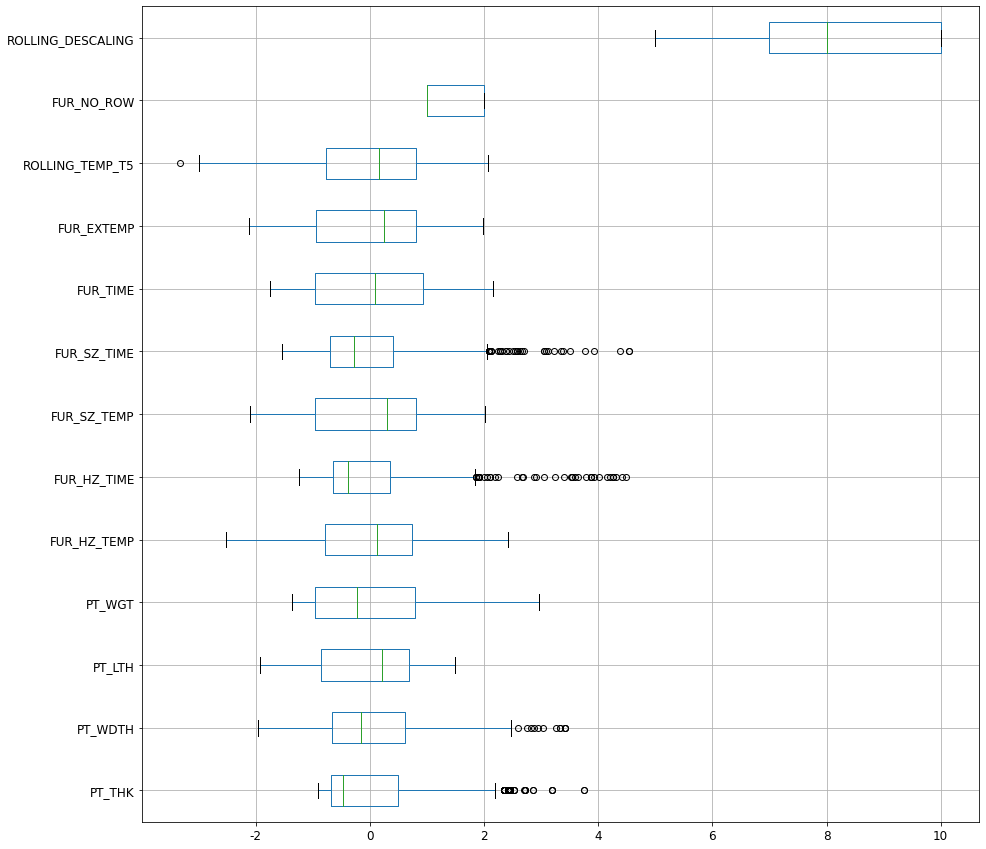

In [739]:
df_scaled.boxplot(figsize=(15,15),fontsize=12,vert=False)

- ROLLING_DESCALING, FUR_NO_ROW은 명목형이나 다름없는 수치형이므로 논외.
- FUR_SZ_TIME, FUR_HZ_TIME, PT_WDTH, PT_THK에서 이상치가 발견되었으나, 각 이상치가 의미가 없다고는 보장할 수 없으므로 삭제하지 않고 그냥 진행하기로 했다.

# 그래프 분석

## 각 변수들 분포 확인 (Histogram)

array([[<AxesSubplot:title={'center':'PT_THK'}>,
        <AxesSubplot:title={'center':'PT_WDTH'}>,
        <AxesSubplot:title={'center':'PT_LTH'}>,
        <AxesSubplot:title={'center':'PT_WGT'}>],
       [<AxesSubplot:title={'center':'FUR_HZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_HZ_TIME'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TEMP'}>,
        <AxesSubplot:title={'center':'FUR_SZ_TIME'}>],
       [<AxesSubplot:title={'center':'FUR_TIME'}>,
        <AxesSubplot:title={'center':'FUR_EXTEMP'}>,
        <AxesSubplot:title={'center':'ROLLING_TEMP_T5'}>,
        <AxesSubplot:title={'center':'FUR_NO_ROW'}>],
       [<AxesSubplot:title={'center':'ROLLING_DESCALING'}>,
        <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

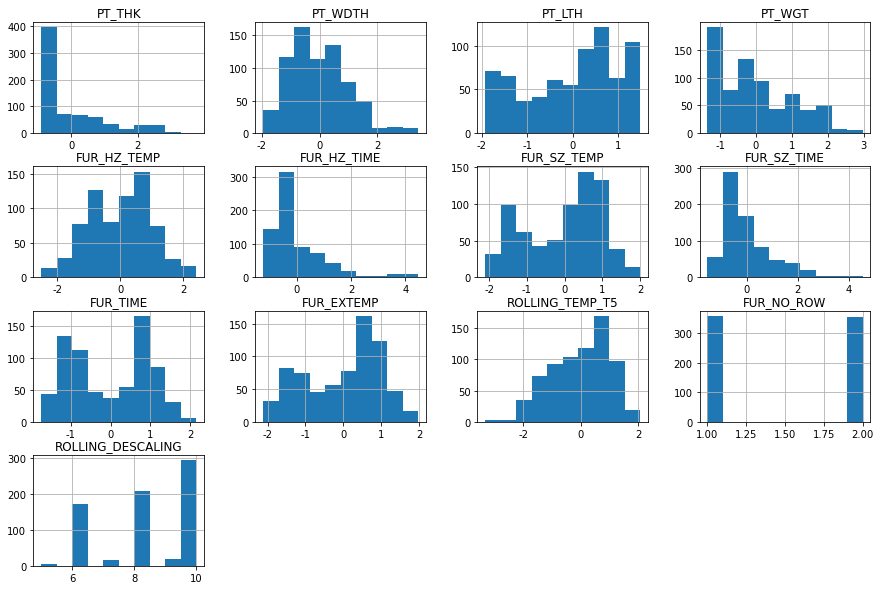

In [742]:
df_scaled.hist(figsize=(15, 10))

- ROLLING_DESCALING, FUR_NO_ROW,HSB는 실질적으로 명목형이므로 논외

## 강종과 scale 불량과의 관계

Text(0.5, 1.0, 'Tool Steel')

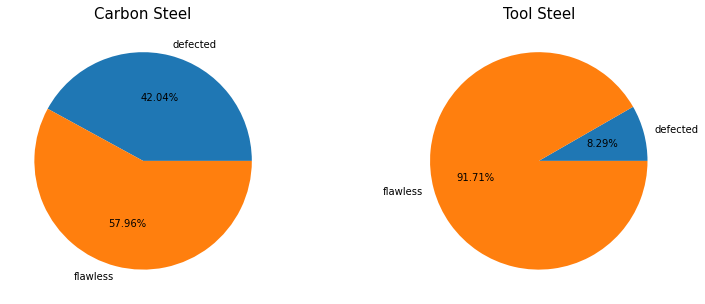

In [743]:
df_scaled_C = df_scaled[df_scaled["STEEL_KIND"]=="C"]
df_scaled_T = df_scaled[df_scaled["STEEL_KIND"]=="T"]

df_count1 = df_scaled_C.groupby(["SCALE"]).size()
df_count2 = df_scaled_T.groupby(["SCALE"]).size()

scale = ["defected","flawless"]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

ax[0].pie(df_count1.to_numpy(), autopct="%.2f%%",labels=scale)
ax[0].set_title("Carbon Steel", fontsize = 15)

ax[1].pie(df_count2.to_numpy(), autopct="%.2f%%",labels=scale)
ax[1].set_title("Tool Steel", fontsize = 15)

- Tool Steel(T)에 비해 **Carbon Steel(C)의 불량비율이 더 높다.**
- 불량 원인 중 하나가 강종일 가능성이 존재한다.

## Descaling 횟수와 scale 불량과의 관계

Text(0.5, 1.0, '10 times')

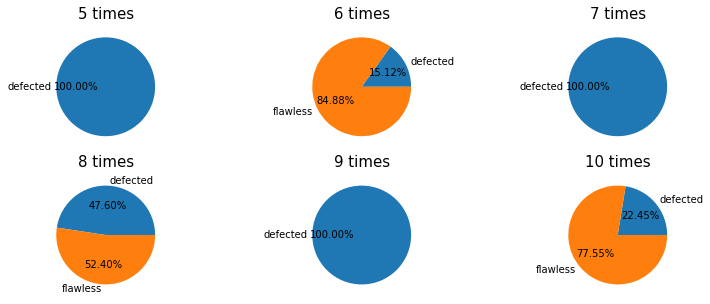

In [744]:
df_scaled_5 = df_scaled[df_scaled["ROLLING_DESCALING"]==5]
df_scaled_6 = df_scaled[df_scaled["ROLLING_DESCALING"]==6]
df_scaled_7 = df_scaled[df_scaled["ROLLING_DESCALING"]==7]
df_scaled_8 = df_scaled[df_scaled["ROLLING_DESCALING"]==8]
df_scaled_9 = df_scaled[df_scaled["ROLLING_DESCALING"]==9]
df_scaled_10 = df_scaled[df_scaled["ROLLING_DESCALING"]==10]

df_count5 = df_scaled_5.groupby(["SCALE"]).size()
df_count6 = df_scaled_6.groupby(["SCALE"]).size()
df_count7 = df_scaled_7.groupby(["SCALE"]).size()
df_count8 = df_scaled_8.groupby(["SCALE"]).size()
df_count9 = df_scaled_9.groupby(["SCALE"]).size()
df_count10 = df_scaled_10.groupby(["SCALE"]).size()

scale = ["defected","flawless"]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 5))

ax[0][0].pie(df_count5.to_numpy(), autopct="%.2f%%",labels=["defected"])
ax[0][0].set_title("5 times", fontsize = 15)

ax[0][1].pie(df_count6.to_numpy(), autopct="%.2f%%",labels=scale)
ax[0][1].set_title("6 times", fontsize = 15)

ax[0][2].pie(df_count7.to_numpy(), autopct="%.2f%%",labels=["defected"])
ax[0][2].set_title("7 times", fontsize = 15)

ax[1][0].pie(df_count8.to_numpy(), autopct="%.2f%%",labels=scale)
ax[1][0].set_title("8 times", fontsize = 15)

ax[1][1].pie(df_count9.to_numpy(), autopct="%.2f%%",labels=["defected"])
ax[1][1].set_title("9 times", fontsize = 15)

ax[1][2].pie(df_count10.to_numpy(), autopct="%.2f%%",labels=scale)
ax[1][2].set_title("10 times", fontsize = 15)

descaling 횟수와 불량률의 관계를 직접적으로 찾기는 어렵다. **따라서 descaling 횟수는 scale 불량여부에 영향을 미치지 않는다.**

## HSB 적용 여부에 따른 scale 불량 비율

Text(0.5, 1.0, 'HSB not applied')

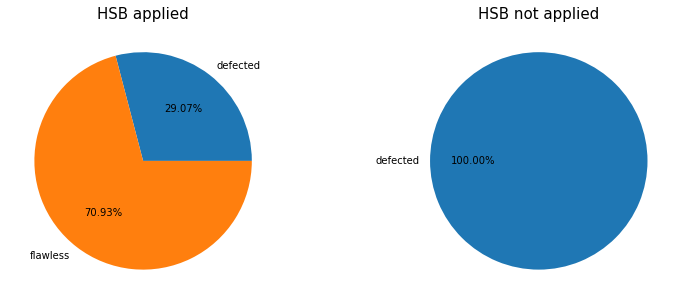

In [745]:
df_scaled_applied = df_scaled[df_scaled["HSB"]=="applied"]
df_scaled_Napplied = df_scaled[df_scaled["HSB"]=="not-applied"]

df_count1 = df_scaled_applied.groupby(["SCALE"]).size()
df_count2 = df_scaled_Napplied.groupby(["SCALE"]).size()

scale = ["defected","flawless"]

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 5))

ax[0].pie(df_count1.to_numpy(), autopct="%.2f%%",labels=scale)
ax[0].set_title("HSB applied", fontsize = 15)

ax[1].pie(df_count2.to_numpy(), autopct="%.2f%%",labels=["defected"])
ax[1].set_title("HSB not applied", fontsize = 15)

- HSB를 하지 않은 경우는 모두 불량이지만, **HSB를 적용하면 상대적으로 불량 비율이 적어진다.**
- 불량 원인 중 하나가 HSB 미적용일 가능성이 존재한다.

## 온도 및 시간 변수와 scale 불량과의 관계

In [746]:
# 한글이 제대로 나오지 않아 영어로 처리

df_raw.replace({'SCALE': '양품'}, {"SCALE": 'flawless'},inplace=True)
df_raw.replace({'SCALE': '불량'}, {'SCALE': 'defected'},inplace=True)

df_raw.replace({'HSB': '적용'}, {'HSB': "applied"},inplace=True)
df_raw.replace({'HSB': '미적용'},{'HSB': "not-applied"},inplace=True)

df_raw["FUR_NO"] = df_scaled["FUR_NO"].str[:1]  # 가장 앞글자만 따옴
df_raw["WORK_GR"] = df_scaled["WORK_GR"].str[:1]  # 가장 앞글자만 따옴

df_raw.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_NO_ROW,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,flawless,AB/EH32-TM,T,32.25,3707,15109,14180,1,1,1144,116,1133,59,282,1125,934,applied,8,2
1,flawless,AB/EH32-TM,T,32.25,3707,15109,14180,1,2,1144,122,1135,53,283,1120,937,applied,8,2
2,flawless,NV-E36-TM,T,33.27,3619,19181,18130,2,1,1129,116,1121,55,282,1106,889,applied,8,3
3,flawless,NV-E36-TM,T,33.27,3619,19181,18130,2,2,1152,125,1127,68,316,1113,885,applied,8,3
4,flawless,BV-EH36-TM,T,38.33,3098,13334,12430,3,1,1140,134,1128,48,314,1118,873,applied,8,1


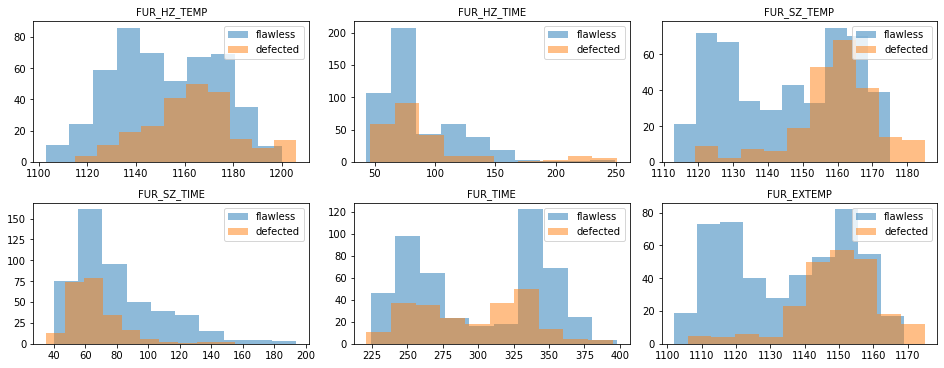

In [747]:
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (13, 5),constrained_layout=True)

ax[0][0].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_HZ_TEMP"], label = "flawless", alpha = 0.5)
ax[0][0].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_HZ_TEMP"], label = "defected", alpha = 0.5)
ax[0][0].set_title("FUR_HZ_TEMP", fontsize = 10)
ax[0][0].legend()

ax[0][1].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_HZ_TIME"], label = "flawless", alpha = 0.5)
ax[0][1].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_HZ_TIME"], label = "defected", alpha = 0.5)
ax[0][1].set_title("FUR_HZ_TIME", fontsize = 10)
ax[0][1].legend()

ax[0][2].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_SZ_TEMP"], label = "flawless", alpha = 0.5)
ax[0][2].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_SZ_TEMP"], label = "defected", alpha = 0.5)
ax[0][2].set_title("FUR_SZ_TEMP", fontsize = 10)
ax[0][2].legend()

ax[1][0].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_SZ_TIME"], label = "flawless", alpha = 0.5)
ax[1][0].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_SZ_TIME"], label = "defected", alpha = 0.5)
ax[1][0].set_title("FUR_SZ_TIME", fontsize = 10)
ax[1][0].legend()

ax[1][1].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_TIME"], label = "flawless", alpha = 0.5)
ax[1][1].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_TIME"], label = "defected", alpha = 0.5)
ax[1][1].set_title("FUR_TIME", fontsize = 10)
ax[1][1].legend()

ax[1][2].hist(df_raw[df_raw["SCALE"] == "flawless"]["FUR_EXTEMP"], label = "flawless", alpha = 0.5)
ax[1][2].hist(df_raw[df_raw["SCALE"] == "defected"]["FUR_EXTEMP"], label = "defected", alpha = 0.5)
ax[1][2].set_title("FUR_EXTEMP", fontsize = 10)
ax[1][2].legend()

- **온도** 관련변수(FUR_HZ_TEMP, FUR_SZ_TEMP, FUR_EXTEMP)는 그 값이 **커질수록 불량 수가 증가**하는 경향이 있다.  
- **시간** 관련변수(FUR_HZ_TIME, FUR_SZ_TIME, FUR_TIME)는 그 값이 **작을수록 불량 수가 증가**하는 경향이 있다.  

## 압연온도와 scale 불량과의 관계

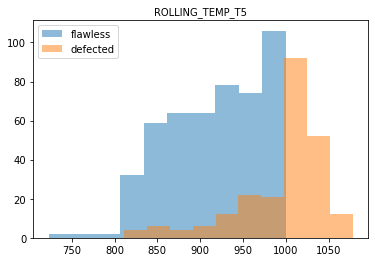

In [748]:
plt.hist(df_raw[df_raw["SCALE"] == "flawless"]["ROLLING_TEMP_T5"], label = "flawless", alpha = 0.5)
plt.hist(df_raw[df_raw["SCALE"] == "defected"]["ROLLING_TEMP_T5"], label = "defected", alpha = 0.5)
plt.title("ROLLING_TEMP_T5", fontsize = 10)
plt.legend()

압연온도가 **높아질수록 불량 수가 증가**하는 경향이 있다.

## plate의 두께, 너비, 길이, 무게와 scale 불량과의 관계

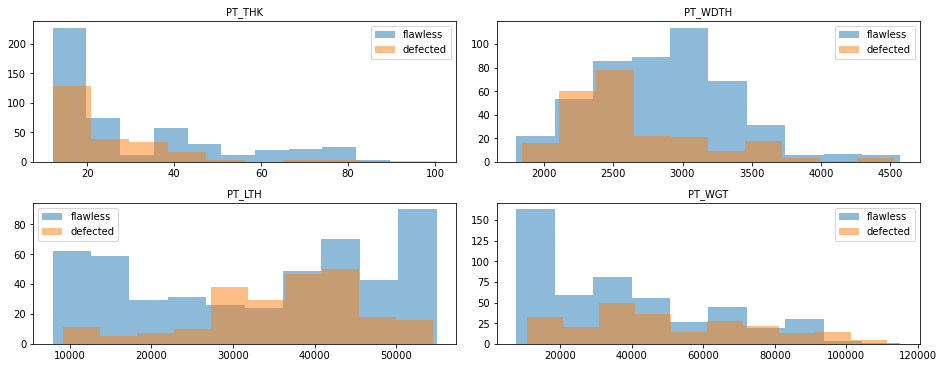

In [749]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 5),constrained_layout=True)

ax[0][0].hist(df_raw[df_raw["SCALE"] == "flawless"]["PT_THK"], label = "flawless", alpha = 0.5)
ax[0][0].hist(df_raw[df_raw["SCALE"] == "defected"]["PT_THK"], label = "defected", alpha = 0.5)
ax[0][0].set_title("PT_THK", fontsize = 10)
ax[0][0].legend()

ax[0][1].hist(df_raw[df_raw["SCALE"] == "flawless"]["PT_WDTH"], label = "flawless", alpha = 0.5)
ax[0][1].hist(df_raw[df_raw["SCALE"] == "defected"]["PT_WDTH"], label = "defected", alpha = 0.5)
ax[0][1].set_title("PT_WDTH", fontsize = 10)
ax[0][1].legend()

ax[1][0].hist(df_raw[df_raw["SCALE"] == "flawless"]["PT_LTH"], label = "flawless", alpha = 0.5)
ax[1][0].hist(df_raw[df_raw["SCALE"] == "defected"]["PT_LTH"], label = "defected", alpha = 0.5)
ax[1][0].set_title("PT_LTH", fontsize = 10)
ax[1][0].legend()

ax[1][1].hist(df_raw[df_raw["SCALE"] == "flawless"]["PT_WGT"], label = "flawless", alpha = 0.5)
ax[1][1].hist(df_raw[df_raw["SCALE"] == "defected"]["PT_WGT"], label = "defected", alpha = 0.5)
ax[1][1].set_title("PT_WGT", fontsize = 10)
ax[1][1].legend()

- plate의 **두께가 얇을수록** 불량 수가 증가하는 경향이 있다.
- plate의 **너비가 좁을수록** 불량 수가 증가하는 경향이 있다.
- plate의 **길이가 길수록** 불량 수가 증가하는 경향이 있다.
- plate의 무게와 scale 불량 간에 관계는 없다.

## 추가적인 변수 삭제

In [750]:
# 앞에서 봤듯이 ROLLING_DESCALING은 SCALE에 큰 영향을 미치지 않는 것으로 판단되어 삭제하기로 했다. 
# 또한 WORK_GR, FUR_NO, FUR_NO_ROW, SPEC도 중요변수라한들 개선 방안 혹은 해결책을 제시하기는 어렵다고 판단하여 삭제하기로 했다.
df_scaled.drop(["ROLLING_DESCALING","WORK_GR","FUR_NO","FUR_NO_ROW","SPEC"],axis=1,inplace=True)
df_scaled.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,SCALE,STEEL_KIND,HSB
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132,flawless,T,applied
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514,flawless,T,applied
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387,flawless,T,applied
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210,flawless,T,applied
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678,flawless,T,applied


# 모델 선정

## 로지스틱 회귀분석

In [751]:
print(df_scaled[df_scaled["SCALE"]=="defected"].shape)
print(df_scaled[df_scaled["SCALE"]=="flawless"].shape)

(231, 14)
(483, 14)


In [752]:
# 목표변수를 숫자로 미리 바꾸지 않으면 회귀분석 시 오류 발생
df_scaled["SCALE"] = np.where(df_scaled["SCALE"] == "defected", 1, 0)
print(df_scaled[df_scaled["SCALE"]==1].shape)
print(df_scaled[df_scaled["SCALE"]==0].shape)

(231, 14)
(483, 14)


In [753]:
df_train, df_test = train_test_split(df_scaled, test_size = 0.4, random_state = 1234)

print("train data shape: ", df_train.shape)
print("test data shape: ", df_test.shape)

train data shape:  (428, 14)
test data shape:  (286, 14)


### 로지스틱 회귀모델 생성

In [754]:
log_model = Logit.from_formula("SCALE ~ PT_THK + PT_WDTH + PT_LTH + PT_WGT + FUR_HZ_TEMP + FUR_HZ_TIME + \
                                            FUR_SZ_TEMP + FUR_SZ_TIME + FUR_TIME + FUR_EXTEMP + ROLLING_TEMP_T5 + \
                                            C(STEEL_KIND) + C(HSB)", df_train)

log_result = log_model.fit()

print(log_result.summary())

         Current function value: 0.252672
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  428
Model:                          Logit   Df Residuals:                      414
Method:                           MLE   Df Model:                           13
Date:                Wed, 01 Sep 2021   Pseudo R-squ.:                  0.5958
Time:                        01:29:31   Log-Likelihood:                -108.14
converged:                      False   LL-Null:                       -267.57
Covariance Type:            nonrobust   LLR p-value:                 2.700e-60
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -3.3341      0.612     -5.447      0.000      -4.534      -2.134
C(STEEL_KIND)[T.T]        2.9744

/home/piai/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


1. Pseudo R-squ.: 0.5958  
이 기본 설정으로 만들어진 로지스틱 회귀 모델은 **약 59% 정도 설명 가능**하다.

2. **STEEL_KIND, PT_WDTH, FUR_SZ_TEMP, ROLLING_TEMP_T5**의 P>|t|는 유의수준(0.05)보다 작다.  
이 변수들이 유의한 변수이다.

### 모델 예측 및 성능 평가

In [755]:
# test 데이터 예측
y_pred = log_result.predict(df_test)

# 0과 1의 값을 가진 class로 변환
y_pred_class = (y_pred > 0.5).astype(int)
y_pred_class.head()

522    0
473    0
645    0
267    0
444    0
dtype: int64

In [756]:
print("총 test-set 개수:",y_pred_class.count())
a_0 = y_pred_class == 0
print("양품으로 예측한 개수:",a_0.sum())
a_1 = y_pred_class == 1
print("불량으로 예측한 개수",a_1.sum())

총 test-set 개수: 286
양품으로 예측한 개수: 187
불량으로 예측한 개수 99


In [757]:
# 실제 test 데이터의 목표변수와 test 데이터의 예측값 비교
print("Accuracy: {0:.3f}\n".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))

Accuracy: 0.867

Confusion Matrix: 
[[170  21]
 [ 17  78]]


1. 이 모델의 예측 정확도는 0.867이다. **즉, 86.7% 정도는 정답을 맞춘다.**
2. precision은 78/(21+78) = 78/99 ≓ 0.79이다. **즉, 불량이라고 예측한 것 중에 맞춘 비율은 약 78%이다.**
3. recall은 78/(17+78) = 78/95 ≓ 0.82이다. **즉, 실제로 불량인 것 중에 예측을 맞춘 비율은 약 82%이다.**
4. precision이 더 중요한지 아니면 recall이 더 중요한지는 해당 기업에 어느 부분에 더 가치를 두는지에 따라 달라진다.
- '1 - precision' : 불량이라고 예측했다. 그래서 보수를 했다. 근데 알고보니 불량이 아니다. 이에 대한 비용이 발생했다.
- '1 - recall' : 실제 불량인데 정상이라고 판단해서 보낸 물품. 소비자가 불만을 가지고 추후에 해당 제품을 사용하지 않을 수도 있다.

### 모델이 말하는 중요한 변수

<AxesSubplot:>

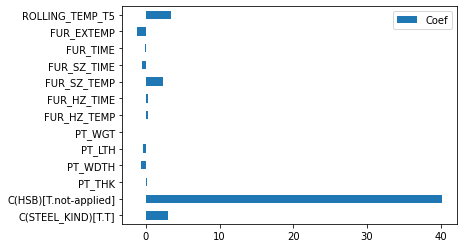

In [758]:
# 설명변수 중요도
df_logistic_coef = pd.DataFrame({"Coef": log_result.params.values[1:]}, index = log_model.exog_names[1:])

df_logistic_coef.plot.barh(y = "Coef")

HSB, ROLLING_TEMP_T5, STEEL_KIND, FUR_SZ_TEMP 순으로 scale 불량에 영향을 많이 미치는 것으로 나타났다.
- **HSB 과정을 "진행하지 않았을 때" scale 불량일 가능성이 높다.**
- **강종이 Carbon Steel 이 아닌 "Tool Steel일 때" scale 불량일 가능성이 높다.**
- **압연온도가 "높을수록" scale 불량일 가능성이 높다.**
- **가열로 균열대 온도가 "높을수록" scale 불량일 가능성이 높다.**

## Random Forest (Classifier)

### 목표변수, 설명변수 분리

In [763]:
df_scaled_x = df_scaled.drop("SCALE",axis=1)
df_scaled_y = df_scaled["SCALE"]
df_scaled_x.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,STEEL_KIND,HSB
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132,T,applied
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514,T,applied
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387,T,applied
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210,T,applied
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678,T,applied


In [764]:
df_scaled_y.head()

0    0
1    0
2    0
3    0
4    0
Name: SCALE, dtype: int64

### 더미변수 생성

In [766]:
# get_dummies: 데이터의 문자형 변수에 대한 더미변수 생성 
df_scaled_x_dummy = pd.get_dummies(df_scaled_x)

# 더미변수 생성된 데이터의 상위 5개 row를 확인
df_scaled_x_dummy.head()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,STEEL_KIND_C,STEEL_KIND_T,HSB_applied,HSB_not-applied
0,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.764075,-0.958762,-0.626900,-0.401705,-0.824152,-0.118132,0,1,1,0
1,0.165524,1.738825,-1.399249,-1.102663,-0.550140,0.929201,-0.844450,-0.856285,-0.379613,-1.105167,-0.072514,0,1,1,0
2,0.219261,1.568260,-1.103953,-0.943272,-1.270256,0.764075,-1.644633,-0.779823,-0.401705,-1.892008,-0.802387,0,1,1,0
3,0.219261,1.568260,-1.103953,-0.943272,-0.166077,1.011765,-1.301698,-0.282822,0.349415,-1.498588,-0.863210,0,1,1,0
4,0.485835,0.558436,-1.527970,-1.173279,-0.742171,1.259454,-1.244542,-1.047439,0.305232,-1.217573,-1.045678,0,1,1,0


### train, test 데이터 분할

In [767]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_scaled_x_dummy, df_scaled_y, test_size = 0.4, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (428, 15)
train data Y size : (428,)
test data X size : (286, 15)
test data Y size : (286,)


### 기본 옵션으로 랜덤포레스트 생성

In [770]:
rf_uncustomized = RandomForestClassifier(random_state=1234)
rf_uncustomized.fit(df_train_x,df_train_y)

#train data 설명력 (결정계수 확인)
print("score on training set :{:.3f}".format(rf_uncustomized.score(df_train_x,df_train_y)))

#test data 설명력 (결정계수 확인)
print("score on test set :{:.3f}".format(rf_uncustomized.score(df_test_x,df_test_y)))

print(rf_uncustomized)

score on training set :1.000
score on test set :0.944
RandomForestClassifier(random_state=1234)


test-set의 설명력이 높지만 train-set의 설명력이 1이므로 over-fitting이다.

### n_estimators 값에 따라 비교

In [771]:
# train 및 test 설명력 결과 저장
train_score = [];test_score=[]
para_n_tree = [n_tree * 10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score

df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,10,0.995,0.909
1,20,0.995,0.937
2,30,0.998,0.934
3,40,1.000,0.937
4,50,1.000,0.934
5,60,1.000,0.934
6,70,1.000,0.937
7,80,1.000,0.941
8,90,1.000,0.944
9,100,1.000,0.944


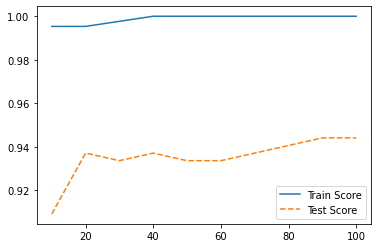

In [772]:
# 모델 설명력 확인 그래프
plt.plot(para_n_tree,train_score,linestyle="-",label="Train Score")
plt.plot(para_n_tree,test_score,linestyle="--",label="Test Score")
plt.legend()

test 정확도가 적절하게 높으면서 over-fitting을 방지하기 위해 80 정도로 선택했다.

### min_samples_leaf 값에 따라 비교

In [773]:
# train 및 test 설명력 결과 저장
train_score = [];test_score=[]
para_leaf = [n_leaf * 1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(n_estimators=80,random_state=1234,min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.941
1,2,0.979,0.944
2,3,0.974,0.916
3,4,0.967,0.913
4,5,0.965,0.916
5,6,0.963,0.913
6,7,0.958,0.906
7,8,0.956,0.888
8,9,0.949,0.860
9,10,0.942,0.867


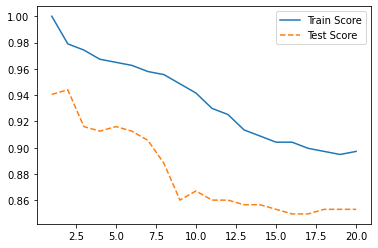

In [774]:
# 모델 설명력 확인 그래프
plt.plot(para_leaf,train_score,linestyle="-",label="Train Score")
plt.plot(para_leaf,test_score,linestyle="--",label="Test Score")
plt.legend()

leaf node에 들어가는 데이터 수가 너무 적으면 over-fitting되므로 7로 선택했다.

### min_samples_split 값에 따라 비교

In [775]:
# train 및 test 설명력 결과 저장
train_score = [];test_score=[]
para_split = [n_split * 2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(n_estimators=80,random_state=1234,min_samples_leaf=7,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesSplit"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score

df_score_split.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,4,0.958,0.906
1,6,0.958,0.906
2,8,0.958,0.906
3,10,0.958,0.906
4,12,0.958,0.906
5,14,0.958,0.906
6,16,0.956,0.892
7,18,0.960,0.899
8,20,0.960,0.913
9,22,0.963,0.899


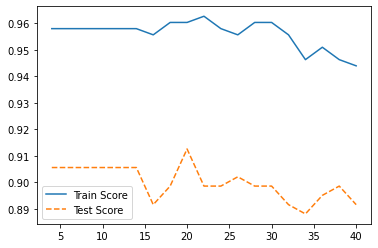

In [776]:
# 모델 설명력 확인 그래프
plt.plot(para_split,train_score,linestyle="-",label="Train Score")
plt.plot(para_split,test_score,linestyle="--",label="Test Score")
plt.legend()

test 정확도가 높아지는 순간인 20으로 선택했다.

### max_depth 값에 따라 비교

In [777]:
# train 및 test 설명력 결과 저장
train_score = [];test_score=[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(n_estimators=80,random_state=1234,min_samples_leaf=7,min_samples_split=20,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score

df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.832,0.808
1,2,0.904,0.878
2,3,0.932,0.881
3,4,0.944,0.895
4,5,0.960,0.909
5,6,0.960,0.913
6,7,0.960,0.909
7,8,0.960,0.909
8,9,0.960,0.913
9,10,0.960,0.913


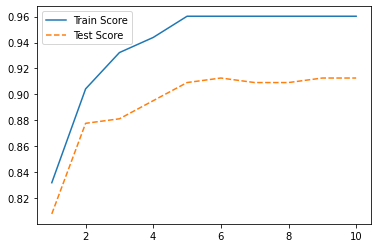

In [778]:
# 모델 설명력 확인 그래프
plt.plot(para_depth,train_score,linestyle="-",label="Train Score")
plt.plot(para_depth,test_score,linestyle="--",label="Test Score")
plt.legend()

depth가 너무 크면 over-fitting이 되고 5부터 거의 일정하므로 5로 선택했다.

### 최종 모델 선정

In [780]:
rf_final = RandomForestClassifier(n_estimators=80, min_samples_leaf = 7, min_samples_split = 20, max_depth = 5, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

RandomForestClassifier(max_depth=5, min_samples_leaf=7, min_samples_split=20,
                       n_estimators=80, random_state=1234)

### 모델 예측 및 성능 평가 

In [781]:
y_pred = rf_final.predict(df_test_x)

print("accuracy on training set: {:.3f}".format(rf_final.score(df_train_x,df_train_y)))
print("accuracy on test set: {:.3f}".format(rf_final.score(df_test_x,df_test_y)))
print("Confusion matrix:\n{}".format(confusion_matrix(df_test_y,y_pred)))

accuracy on training set: 0.960
accuracy on test set: 0.909
Confusion matrix:
[[188   3]
 [ 23  72]]


1. 이 모델의 예측 정확도는 0.909이다. **즉, 90% 정도는 정답을 맞춘다.**
2. precision은 72/(3+72) = 72/75 = 0.96이다. **즉, 불량이라고 예측한 것 중에 맞춘 비율은 96%이다.**
3. recall은 72/(23+72) = 72/95 ≓ 0.76이다. **즉, 실제로 불량인 것 중에 예측을 맞춘 비율은 약 76%이다.**
4. precision이 더 중요한지 아니면 recall이 더 중요한지는 해당 기업에 어느 부분에 더 가치를 두는지에 따라 달라진다.
- '1 - precision' : 불량이라고 예측했다. 그래서 보수를 했다. 근데 알고보니 불량이 아니다. 이에 대한 비용이 발생했다.
- '1 - recall' : 실제 불량인데 정상이라고 판단해서 보낸 물품. 소비자가 불만을 가지고 추후에 해당 제품을 사용하지 않을 수도 있다.

### 최종 모델에서의 설명변수의 중요도

In [783]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,ROLLING_TEMP_T5,0.296
1,PT_WDTH,0.120
6,FUR_SZ_TEMP,0.112
9,FUR_EXTEMP,0.076
2,PT_LTH,0.068
8,FUR_TIME,0.057
0,PT_THK,0.049
13,HSB_applied,0.038
12,STEEL_KIND_T,0.035
4,FUR_HZ_TEMP,0.030


Text(0, 0.5, 'variable')

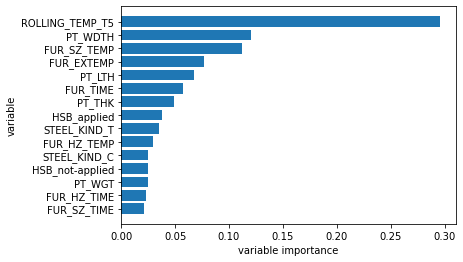

In [785]:
# 중요도가 높은 변수를 상위에 그림
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("variable importance")
plt.ylabel("variable")

ROLLING_TEMP_T5, PT_WDTH, FUR_SZ_TEMP, FUR_EXTEMP 순으로 scale 불량에 영향을 많이 미치는 것으로 나타났다.
- **압연온도가 "높을수록" scale 불량일 가능성이 높다.**
- **plate의 너비가 "클수록" scale 불량일 가능성이 높다.**
- **가열로 균열대 온도가 "높을수록" scale 불량일 가능성이 높다.**
- **추출온도가 "높을수록" scale 불량일 가능성이 높다.**

## Support Vector Machine (Classifier)

### 기본 설정으로 모델 생성

In [786]:
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on training set:0.923
Accuracy on test set:0.850


기본 설정만으로도 성능이 꽤 좋은 편이다.

In [787]:
svm_uncustomized

SVC(random_state=1234)

### C(cost) 조정

In [788]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_c = [10**c for c in range(-2, 2)]

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(3)

,C,TrainAccuracy,TestAccuracy
0,0.01,0.682,0.668
1,0.10,0.855,0.818
2,1.00,0.923,0.850
3,10.00,0.960,0.892


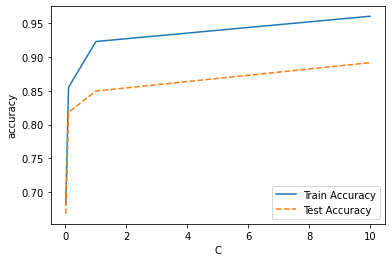

In [789]:
# 정확도를 그래프로 표현
plt.plot(para_c, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_c, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("C")
plt.legend()

너무 크면 over-fitting이 되므로 1.0으로 선택했다.

### Gamma 조정

In [790]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_gamma = [10**gamma for gamma in range(-2, 2)]

for v_gamma in para_gamma:
    svm = SVC(C=1.0, gamma = v_gamma, random_state = 1234)
    svm.fit(df_train_x, df_train_y)
    train_accuracy.append(svm.score(df_train_x, df_train_y))
    test_accuracy.append(svm.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.869,0.829
1,0.10,0.932,0.857
2,1.00,0.986,0.783
3,10.00,1.000,0.675


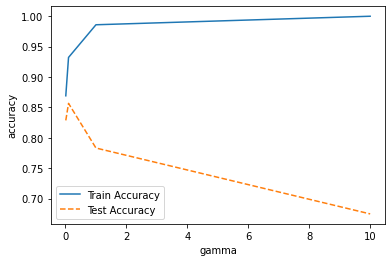

In [791]:
# 정확도를 그래프로 표현
plt.plot(para_gamma, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_gamma, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy"); plt.xlabel("gamma")
plt.legend()

너무 크면 over-fitting되므로 0.10으로 선택했다.

### 최종 SVM 모델 선택

In [794]:
svc_final = SVC(gamma = 0.1, C = 1, random_state = 1234)
svc_final.fit(df_train_x, df_train_y)

y_pred = svc_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(svc_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(svc_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.932
Accuracy on test set: 0.857

Confusion matrix: 
[[178  13]
 [ 28  67]]


1. 이 모델의 예측 정확도는 0.857이다. **즉, 86% 정도는 정답을 맞춘다.**
2. precision은 67/(13+67) = 67/80 = 0.8375이다. **즉, 불량이라고 예측한 것 중에 맞춘 비율은 84%이다.**
3. recall은 67/(28+67) = 67/95 ≓ 0.71이다. **즉, 실제로 불량인 것 중에 예측을 맞춘 비율은 약 71%이다.**
4. precision이 더 중요한지 아니면 recall이 더 중요한지는 해당 기업에 어느 부분에 더 가치를 두는지에 따라 달라진다.
- '1 - precision' : 불량이라고 예측했다. 그래서 보수를 했다. 근데 알고보니 불량이 아니다. 이에 대한 비용이 발생했다.
- '1 - recall' : 실제 불량인데 정상이라고 판단해서 보낸 물품. 소비자가 불만을 가지고 추후에 해당 제품을 사용하지 않을 수도 있다.

## kNN

### k값에 따른 변화

In [797]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_n_neighbors = [i for i in range(1, 16)]

for v_n_neighbors in para_n_neighbors:
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["TrainAccuracy"] = train_accuracy
df_accuracy_neighbors["TestAccuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,TrainAccuracy,TestAccuracy
0,1,1.000,0.773
1,2,0.923,0.808
2,3,0.918,0.822
3,4,0.900,0.822
4,5,0.916,0.808
5,6,0.883,0.808
6,7,0.893,0.801
7,8,0.871,0.808
8,9,0.886,0.811
9,10,0.879,0.811


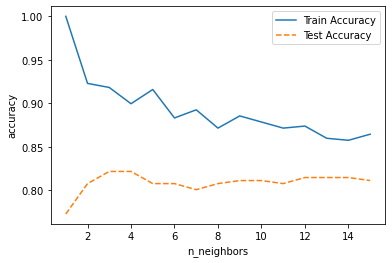

In [798]:
# 정확도를 그래프로 표현
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

이웃의 수를 4 정도로 설정하는 것이 train 정확도가 너무 떨어지지 않으면서도 test 정확도도 높으므로 4로 선택했다.

### 가중치별 k값 변화

In [799]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

# uniform과 distance 두 가지 상황에 대해 비교하기 위해
# 리스트 바깥에 *2를 해주었다.
para_n_neighbors = [i for i in range(1,11)]*2

para_weights = (["uniform"]) * 10 + (["distance"] * 10)

for (v_n_neighbors,v_weights) in zip(para_n_neighbors,para_weights):
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_weights= pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["TrainAccuracy"] = train_accuracy
df_accuracy_weights["TestAccuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,TrainAccuracy,TestAccuracy
0,1,uniform,1.000,0.773
1,2,uniform,0.923,0.808
2,3,uniform,0.918,0.822
3,4,uniform,0.900,0.822
4,5,uniform,0.916,0.808
5,6,uniform,0.883,0.808
6,7,uniform,0.893,0.801
7,8,uniform,0.871,0.808
8,9,uniform,0.886,0.811
9,10,uniform,0.879,0.811


In [800]:
# 데이터 형태 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index="Neighbors",columns="Weights",values=["TrainAccuracy","TestAccuracy"])

level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,TestAccuracy_distance,TestAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.772727,0.772727
2,1.0,0.922897,0.772727,0.807692
3,1.0,0.918224,0.818182,0.821678
4,1.0,0.899533,0.825175,0.821678
5,1.0,0.915888,0.807692,0.807692


<AxesSubplot:xlabel='Neighbors'>

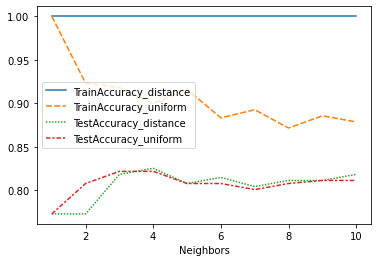

In [801]:
# 정확도를 그래프로 표현
sns.lineplot(data=df_accuracy_weights_pivot)

- distance의 경우 over-fitting이 발생했다. (trainAccuracy_distance가 1이다.)
- uniform의 경우에 이웃을 4개 정도 선정하는 것이 가장 적절하다고 판단했다.

### 거리 계산 방법 조정

In [802]:
# train 및 test 정확도 결과 저장용
train_accuracy = []; test_accuracy = []

para_metric = ["minkowski","euclidean","manhattan"]

for v_metric in para_metric:
    knn = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric=v_metric)
    knn.fit(df_train_x, df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_accuracy_metric = pd.DataFrame()
# df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["TrainAccuracy"] = train_accuracy
df_accuracy_metric["TestAccuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Metric,TrainAccuracy,TestAccuracy
0,minkowski,0.900,0.822
1,euclidean,0.900,0.822
2,manhattan,0.904,0.836


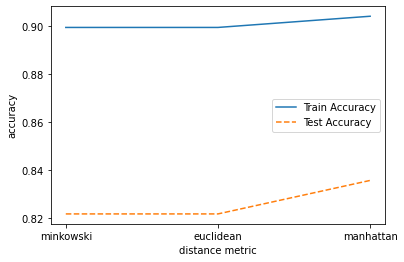

In [803]:
# 정확도를 그래프로 표현
plt.plot(para_metric, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_metric, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("distance metric")
plt.legend()

manhattan 방법이 가장 accuracy가 좋아 이를 택했다.

### 최종 모델 선택

In [804]:
knn_final = KNeighborsClassifier(n_neighbors=4,weights="uniform",metric="manhattan")
knn_final.fit(df_train_x, df_train_y)
 
y_pred = knn_final.predict(df_test_x)

print("Accuracy on training set: {:.3f}".format(knn_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(knn_final.score(df_test_x, df_test_y)))
print("Confusion matrix: \n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.904
Accuracy on test set: 0.836

Confusion matrix: 
[[182   9]
 [ 38  57]]


1. 이 모델의 예측 정확도는 0.836이다. **즉, 84% 정도는 정답을 맞춘다.**
2. precision은 57/(9+57) = 57/66 ≓ 0.86이다. **즉, 불량이라고 예측한 것 중에 맞춘 비율은 86%이다.**
3. recall은 57/(38+57) = 57/95 = 0.6이다. **즉, 실제로 불량인 것 중에 예측을 맞춘 비율은 약 60%이다.**
4. precision이 더 중요한지 아니면 recall이 더 중요한지는 해당 기업에 어느 부분에 더 가치를 두는지에 따라 달라진다.
- '1 - precision' : 불량이라고 예측했다. 그래서 보수를 했다. 근데 알고보니 불량이 아니다. 이에 대한 비용이 발생했다.
- '1 - recall' : 실제 불량인데 정상이라고 판단해서 보낸 물품. 소비자가 불만을 가지고 추후에 해당 제품을 사용하지 않을 수도 있다.

# 모델 평가

In [814]:
# 로지스틱 회귀분석
print("[ Logistic Regression ]")
print("Accuracy:{0:.3f}".format(accuracy_score(df_test["SCALE"], y_pred_class)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test["SCALE"], y_pred_class)))
print("\n")

# 랜덤포레스트
print("[ Random Forest ]")
print("Accuracy:{0:.3f}".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, rf_final.predict(df_test_x))))
print("\n")

# 서포트벡터머신
print("[ Support Vector Machine ]")
print("Accuracy: {:.3f}".format(svc_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, svc_final.predict(df_test_x))))
print("\n")

# kNN
print("[ k-Nearest Neighbors ]")
print("Accuracy : {:.3f}".format(knn_final.score(df_test_x, df_test_y)))
print("Confusion Matrix: \n{}".format(confusion_matrix(df_test_y, knn_final.predict(df_test_x))))

[ Logistic Regression ]
Accuracy:0.867
Confusion Matrix: 
[[170  21]
 [ 17  78]]


[ Random Forest ]
Accuracy:0.909
Confusion Matrix: 
[[188   3]
 [ 23  72]]


[ Support Vector Machine ]
Accuracy: 0.857
Confusion Matrix: 
[[178  13]
 [ 28  67]]


[ k-Nearest Neighbors ]
Accuracy : 0.836
Confusion Matrix: 
[[182   9]
 [ 38  57]]


# 결론

## 1. accuracy 비교
- **Random Forest**가 가장 accuracy가 높으며 분류를 잘 한다.  
- kNN이 가장 accuracy가 안 좋으며 분류도 잘 못한다.

## 2. precision & recall 비교

#### logistic regression
- 불량이라고 예측한 것 중에 맞춘 비율은 약 78%이다.
- 실제로 불량인 것 중에 예측을 맞춘 비율은 약 82%이다.

#### random forest
- 불량이라고 예측한 것 중에 맞춘 비율은 96%이다.
- 실제로 불량인 것 중에 예측을 맞춘 비율은 약 76%이다.

#### svm
- 불량이라고 예측한 것 중에 맞춘 비율은 84%이다.
- 실제로 불량인 것 중에 예측을 맞춘 비율은 약 71%이다.

#### knn 
- 불량이라고 예측한 것 중에 맞춘 비율은 86%이다.
- 실제로 불량인 것 중에 예측을 맞춘 비율은 약 60%이다.


## 3. 모델들이 선정한 중요한 변수

### 1) 로지스틱 회귀  
HSB, ROLLING_TEMP_T5, STEEL_KIND, FUR_SZ_TEMP 순으로 scale 불량에 영향을 많이 미치는 것으로 나타났다.
- **HSB 과정을 "진행하지 않았을 때" scale 불량일 가능성이 높다.**
- **강종이 Carbon Steel 이 아닌 "Tool Steel일 때" scale 불량일 가능성이 높다.**
- **압연온도가 "높을수록" scale 불량일 가능성이 높다.**
- **가열로 균열대 온도가 "높을수록" scale 불량일 가능성이 높다.**

### 2) 랜덤 포레스트  
ROLLING_TEMP_T5, PT_WDTH, FUR_SZ_TEMP, FUR_EXTEMP 순으로 scale 불량에 영향을 많이 미치는 것으로 나타났다.
- **압연온도가 "높을수록" scale 불량일 가능성이 높다.**
- **plate의 너비가 "클수록" scale 불량일 가능성이 높다.**
- **가열로 균열대 온도가 "높을수록" scale 불량일 가능성이 높다.**
- **추출온도가 "높을수록" scale 불량일 가능성이 높다.**

## → 두 모델이 공통적으로 생각한 scale 불량에 영향을 크게 미치는 변수 
## : 압연온도, 가열로 균열대 온도